In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline

from rubin_sim.scheduler.utils import EuclidOverlapFootprint
import glob

In [2]:
filenames = glob.glob('*10yrs.db') 

out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)


In [3]:
nside=64

sky = EuclidOverlapFootprint(nside=nside, smc_radius=4, lmc_radius=6)
footprints_hp_array, labels = sky.return_maps()
# define what area we want to call WFD. Leaving out the bulge and LMC/SMC for now
wfd_indx = np.where((labels == 'lowdust') | (labels == 'virgo') | (labels == 'euclid_overlap'))


rms_dict = {}

for fn in filenames:

    run_name = fn.replace('_10yrs.db', '')
    bundle_list = []


    metric = maf.AccumulateCountMetric(bins=np.arange(0,365.25*11, 365.25))
    sql = 'visitexposuretime > 20 and note not like "%%DD%%"'
    slicer = maf.slicers.HealpixSlicer(nside=nside)

    bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=run_name,
                                           plot_funcs=[maf.HealpixSkyMap()]))



    bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
    bg = maf.metricBundles.MetricBundleGroup(bd, fn, out_dir=out_dir, results_db=results_db)
    bg.run_all()
    
    rmss = [np.std(result[wfd_indx]) for result in bundle_list[0].metric_values.T]
    
    rms_dict[run_name] = rmss


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [4]:
bundle_list[0].metric_values.shape

(49152, 10)

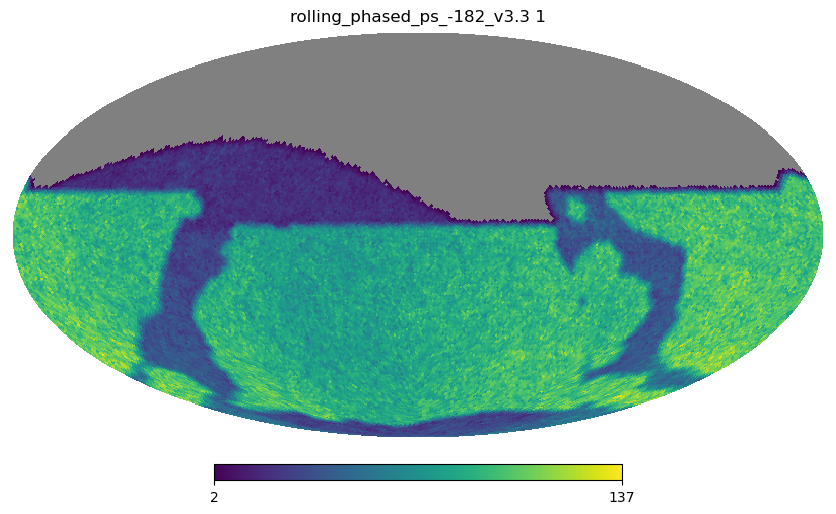

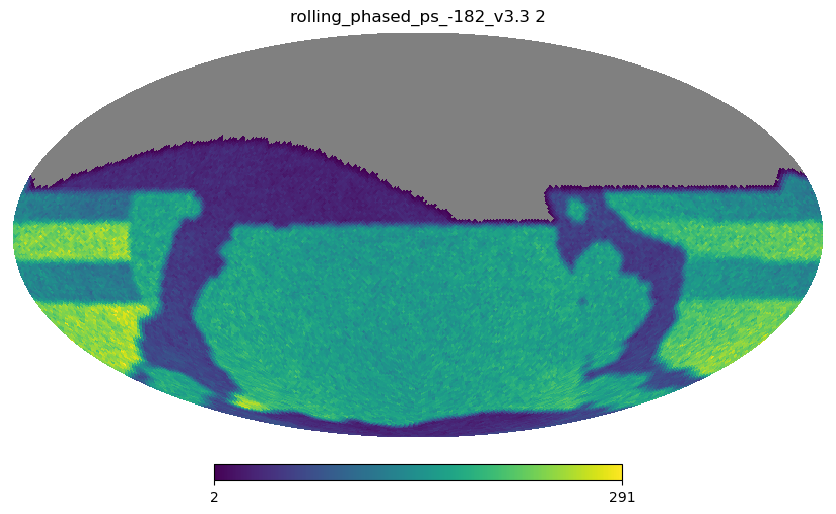

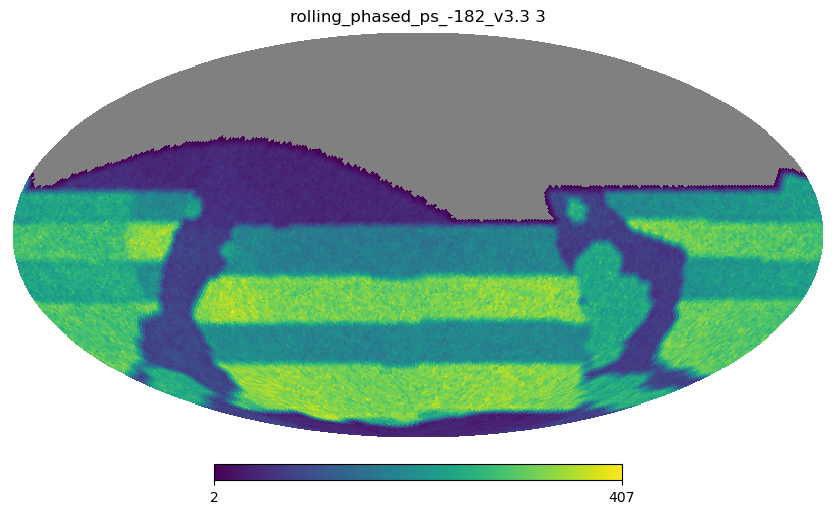

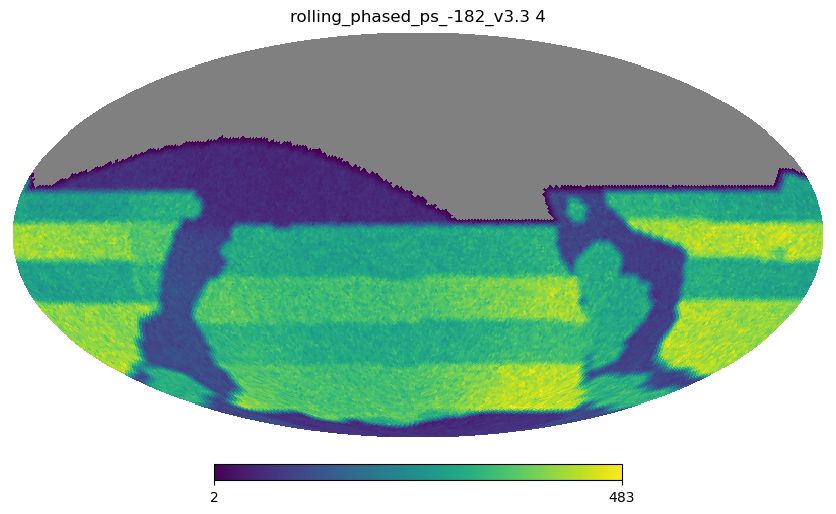

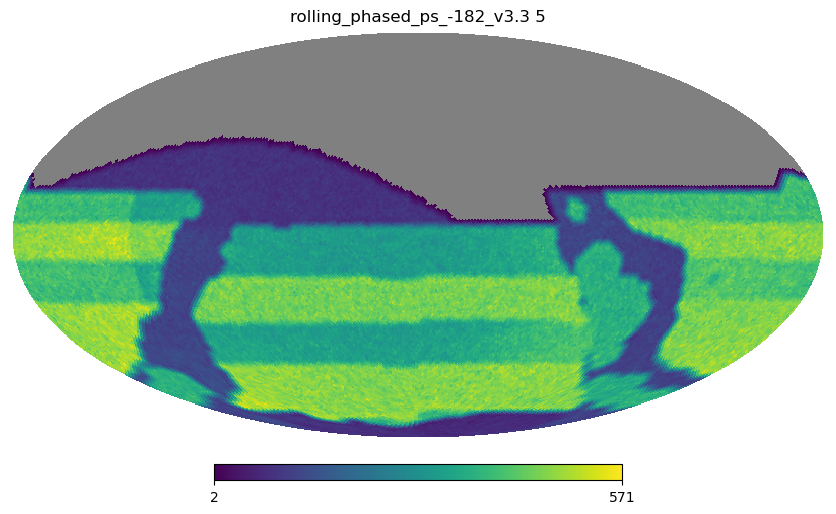

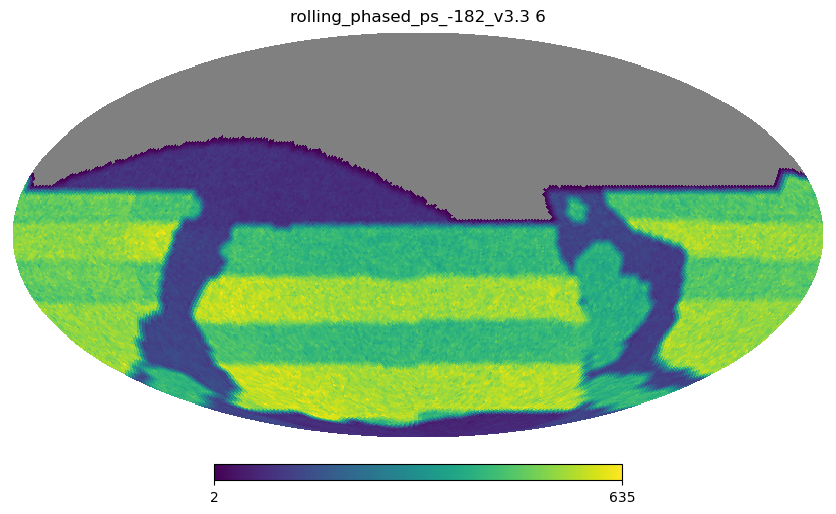

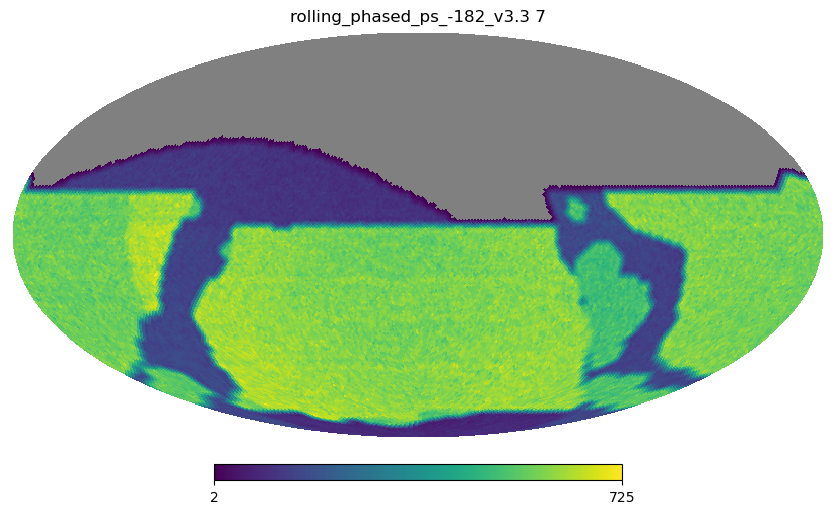

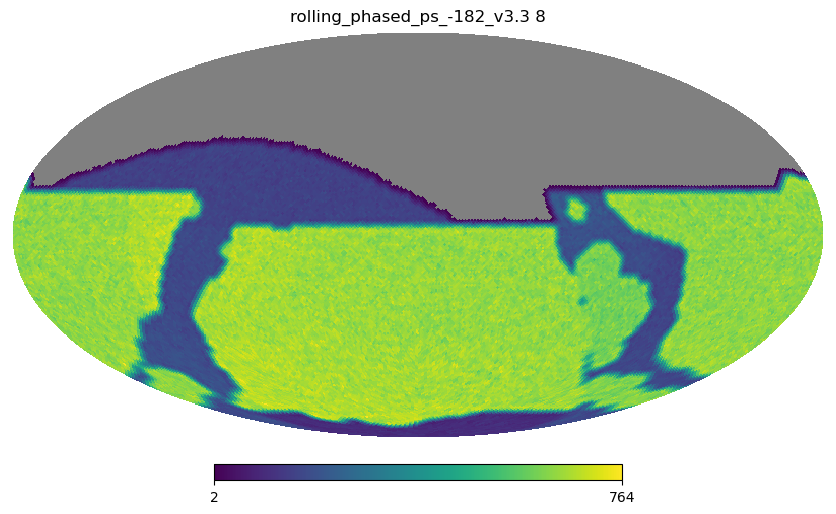

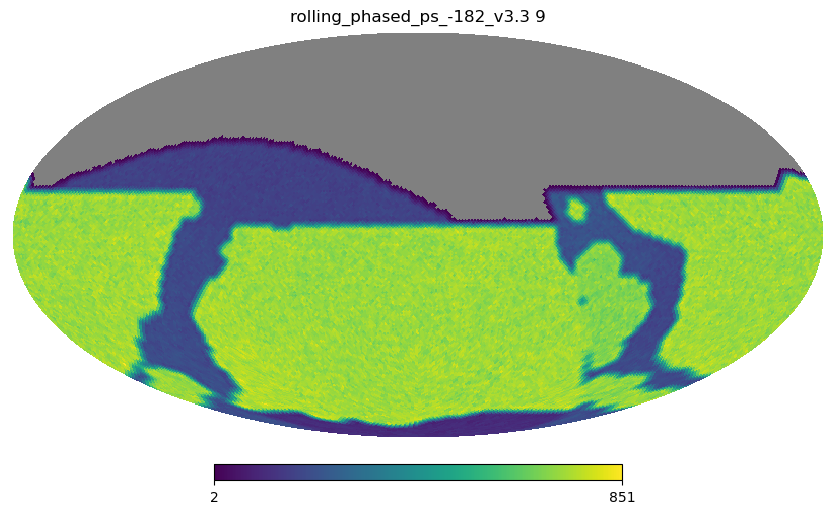

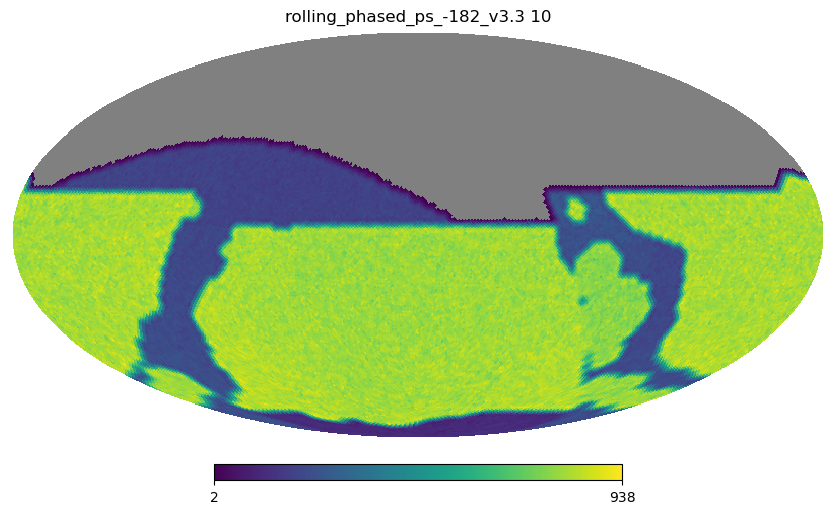

In [5]:
for i in range(bundle_list[0].metric_values.shape[-1]):

    hp.mollview(bundle_list[0].metric_values[:,i], title=run_name + ' %i' % (i+1))

In [6]:
rms_dict

{'rolling_phased_ps_0_v3.3': [11.387599736971541,
  31.74163458352585,
  61.43986204076365,
  34.65539714376544,
  60.303137285349614,
  36.101019526702714,
  64.33540438204874,
  32.466952850978785,
  30.964649822719874,
  33.978658616779434],
 'rolling_phased_ps_182_v3.3': [11.387599736971541,
  31.74163458352585,
  61.43986204076365,
  28.473938374133823,
  48.91026650762295,
  58.01262484758022,
  42.10700027786789,
  61.83949713467194,
  33.100208141425306,
  34.61367068355075],
 'baseline_v3.3': [11.387599736971541,
  31.74163458352585,
  61.43986204076365,
  34.65539714376544,
  60.303137285349614,
  36.101019526702714,
  64.33540438204874,
  38.68377410842963,
  64.18901761832727,
  35.931180427891924],
 'noroll_v3.3': [11.387599736971541,
  14.051252278467578,
  16.016099320307827,
  18.88633389894043,
  20.974919201284326,
  23.281072457033208,
  26.63279408175559,
  28.098717669280255,
  30.632172021264033,
  33.6344017350187],
 'rolling_phased_ps_-182_v3.3': [11.38759973697

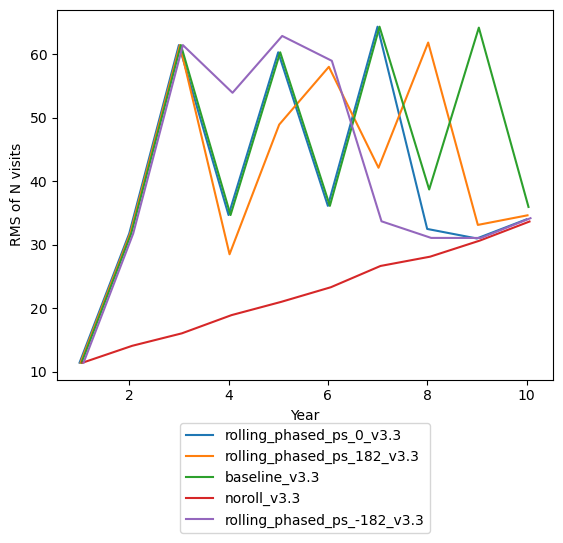

In [7]:
x = np.arange(10)+1
fig = plt.figure(1)
ax = fig.add_subplot(111)

for i,key in enumerate(rms_dict):
    ax.plot(x+.02*i, rms_dict[key], label=key)
    
ax.set_xlabel('Year')
ax.set_ylabel('RMS of N visits')
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1))

In [8]:
rms_dict['baseline_v3.3']

[11.387599736971541,
 31.74163458352585,
 61.43986204076365,
 34.65539714376544,
 60.303137285349614,
 36.101019526702714,
 64.33540438204874,
 38.68377410842963,
 64.18901761832727,
 35.931180427891924]